Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


## Data Collection and Processing 

In [2]:
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
#  First 5 rows of data sets 
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# last 5 rows of dataset
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

Basic information about the data

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Correlation:
 1. Positive Correlation
 2. Negative Correlation

In [9]:
correlation = gold_data.corr()

<AxesSubplot:>

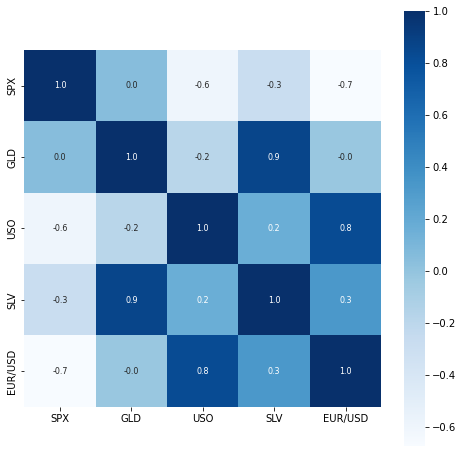

In [10]:
# Show data of correlation on heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

In [12]:
# finding Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Acer\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

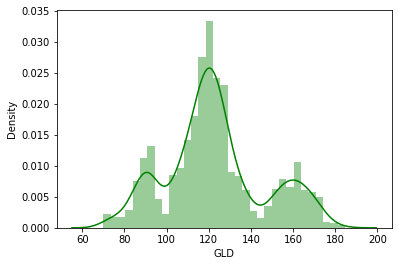

In [13]:
# Distribution 
sns.distplot(gold_data['GLD'], color='green')

Splitting the feature & Targets

In [15]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [16]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training and Testing data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

Model Training:
RANDOM FOREST REGRESSIOR

In [19]:
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
# Training Model 
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Model Evalution

In [21]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [22]:
print(test_data_prediction)

[168.79309983  82.00839999 115.94190026 127.65270083 120.77520133
 154.89239744 150.56049891 125.93580067 117.62139865 126.09320072
 116.55540109 172.1409007  141.34869773 167.7336981  115.12370018
 117.62380066 137.8227028  170.47990108 158.95270301 160.7273991
 155.17520012 125.20900032 176.17809977 157.24570315 125.2072006
  93.9346999   76.6062001  120.77810021 119.12649939 167.36179978
  88.08290042 125.28110081  91.23370104 117.75540034 121.18459886
 137.10050101 115.59770103 114.99950058 149.12279966 107.48390096
 103.86340255  87.05929807 126.55280082 117.94920024 153.29619951
 119.74210004 108.45369995 108.19539826  93.13580003 127.03889793
  74.82570025 113.60299869 121.33980005 111.21889924 118.87439886
 120.84159889 160.10430004 167.97190094 146.87989698  85.81339838
  94.37930025  86.88739913  90.62780015 118.94180064 126.45440114
 127.6005     169.58349967 122.35699944 117.28459903  98.40880025
 168.24170121 143.36019844 131.83270225 121.07320231 120.76239936
 119.7977002

In [23]:
# R Squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [25]:
print("R Squared error: " , error_score)

R Squared error:  0.9890102830159955


Compare the actual value VS predicted value

In [26]:
Y_test = list(Y_test)

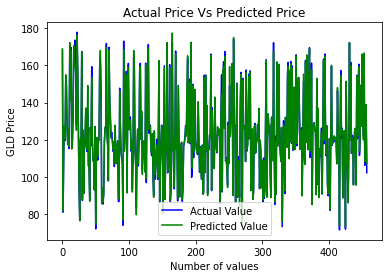

In [27]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color = 'green', label='Predicted Value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
